In [32]:
from obspy import read
from obspy.signal.trigger import ar_pick
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [33]:
st1 = read('data/earthquake/st1.SAC')
st2 = read('data/earthquake/st2.SAC')
st3 = read('data/earthquake/st3.SAC')

threechannels = read('data/earthquake/st1.SAC')
threechannels += read('data/earthquake/st2.SAC')
threechannels += read('data/earthquake/st3.SAC')

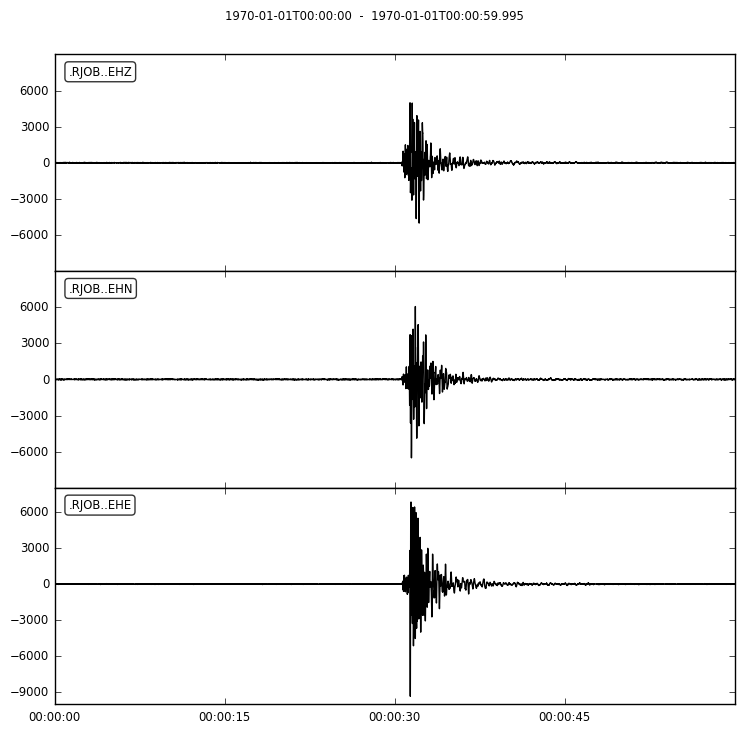

In [34]:
threechannels.plot()

In [35]:
Mt = np.sqrt(st1[0].data**2+st2[0].data**2+st3[0].data**2)

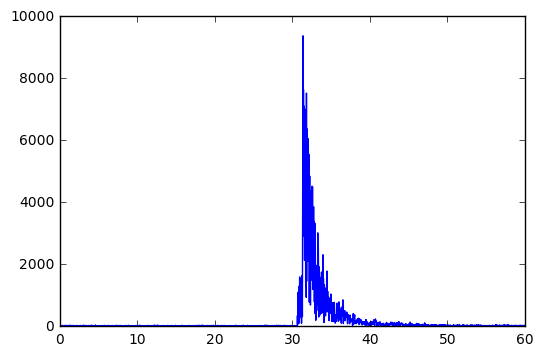

In [36]:
sampling_rate = 1/st1[0].stats.sampling_rate
number_of_samples = st1[0].stats.npts
t = np.arange(0,sampling_rate*number_of_samples,sampling_rate)

plt.plot(t,Mt)

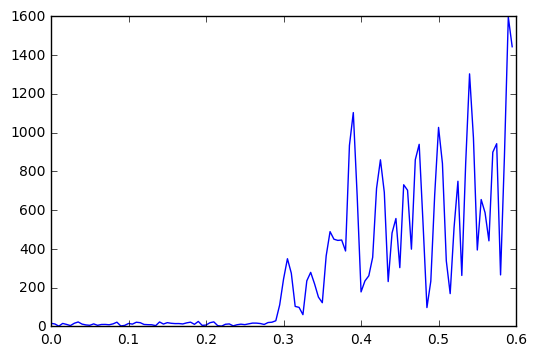

In [37]:
t2 = np.arange(0,sampling_rate*120,sampling_rate)
plt.plot(t2,Mt[6068:6188])

In [38]:
#Axx = (2 / (np.max(tr1.data)-np.min(tr1.data))*(tr1.data-np.max(tr1.data)))+ 1
#Ayy = (2 / (np.max(tr2.data)-np.min(tr2.data))*(tr2.data-np.max(tr2.data)))+ 1
#Azz = (2 / (np.max(tr3.data)-np.min(tr3.data))*(tr3-np.max(tr3.data)))+ 1

In [39]:
#p at [6068:6188]
#pmid at [6125:6135]
#s [6180:6300]
#smid at [6235:6245]

def dop(x,y,z,start,end):
    #create covariance matrix of 3,3
    #cov(x,y)=((x[i:N]*x.mean())*(y[i:N]*y.mean())).sum(0) / (N-i)
    
    #C11 C12 C13
    #C21 C22 C23
    #C31 C32 C33
    
    C11=((x[start:end]-x.mean()) * (x[start:end]-x.mean())).sum(0) / (end-start)
    C12=((x[start:end]-x.mean()) * (y[start:end]-y.mean())).sum(0) / (end-start)
    C13=((x[start:end]-x.mean()) * (z[start:end]-z.mean())).sum(0) / (end-start)
    C21=C12
    C22=((y[start:end]-y.mean()) * (y[start:end]-y.mean())).sum(0) / (end-start)
    C23=((y[start:end]-y.mean()) * (z[start:end]-z.mean())).sum(0) / (end-start)
    C31=C13
    C32=C23
    C33=((z[start:end]-z.mean()) * (z[start:end]-z.mean())).sum(0) / (end-start)
    
    C = np.array([[C11,C12,C13],[C21,C22,C23],[C31,C32,C33]])
    
    #e = lambda1,lambda2,lambda3    
    e = np.linalg.eigvals(C)
    #trs = lambda1+lambda2+lambda3
    trs=e.sum()
    #tr(s**2)=lambda1**2+lamnda2**2+lambda3**2
    trs2=(e**2).sum()
    dop = (3*trs2-trs**2)/(2*trs**2)    
    return dop

In [40]:
x = st1[0].data
y = st2[0].data
z = st3[0].data

start = 6068
end = 6188

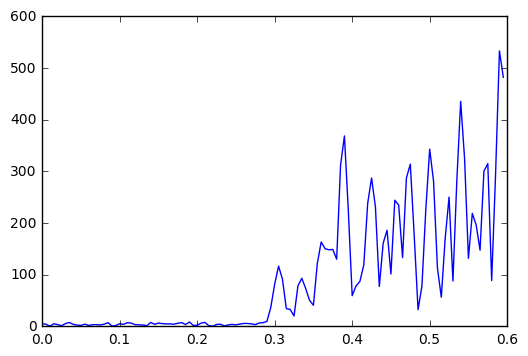

In [46]:
plt.plot(t2,dop(x,y,z,start,end)*Mt[6068:6188])